1. Za pomoci níže uvedeného kódu naimportujte knihovny a do proměnné url získejte adresu datasetu

```python
# Import potrebnych knihoven
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
```

2. Načtete data z proměnné url do pandas dataframe, proměnnou pojmenujte ```df```.
3. Upravte datový typ sloupce ```DATE``` na ```datetime```.
4. Přidejte do ```df``` sloupec ```YEAR``` a ```MONTH```
5. Vypište za pomoci funkce print() datové typy jednotlivých sloupců.

In [15]:
# Buňka pro body 1-5
import pandas as pd
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,sep=';')
df['DATE'] = pd.to_datetime(df['DATE'])
print(df.dtypes)

STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
SNWD              float64
TAVG              float64
TMAX              float64
TMIN              float64
dtype: object


6. Spočítejte korelační koeficient mezi sloupce ```TMAX``` v ```NAME``` RUZYNE a ```TMAX``` v ```NAME``` MOSNOV.
7. Do proměnné ```kumulativni_srazky_ruzyne_2020``` spočítejte kumulativní sumu ```PRPC``` v ```NAME``` RUZYNE za rok 2020.
8. Vizualizujte data z proměnné ```kumulativni_srazky_ruzyne_2020``` pomocí spojnicového grafu.


0.9612321549107491


<Axes: xlabel='DATE'>

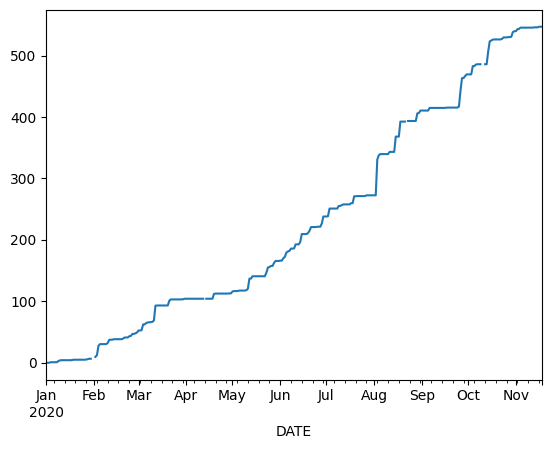

In [16]:
# Buňka pro body 6-8

df.set_index('DATE',inplace=True)
df_ruzyne = df.loc[df['NAME'] == 'RUZYNE','TMAX']
df_mosnov = df.loc[df['NAME'] == 'MOSNOV','TMAX']

r =  df_ruzyne.corr(df_mosnov)
print(r)

df.index = pd.to_datetime(df.index)
df['ROK'] = df.index.year
df = df.loc[(df['ROK']==2020)&(df['NAME']=='RUZYNE'),'PRCP']
df_cumsum = df.cumsum()
df_cumsum.plot()
